


Epoch 1/20

792/792 [==============================] - 14s 11ms/step - loss: 0.0363
Epoch 2/20
792/792 [==============================] - 9s 11ms/step - loss: 0.0142
Epoch 3/20
792/792 [==============================] - 9s 11ms/step - loss: 0.0131
Epoch 4/20
792/792 [==============================] - 12s 16ms/step - loss: 0.0142
Epoch 5/20
792/792 [==============================] - 15s 19ms/step - loss: 0.0134
Epoch 6/20
792/792 [==============================] - 13s 16ms/step - loss: 0.0133
Epoch 7/20
792/792 [==============================] - 13s 16ms/step - loss: 0.0130
Epoch 8/20
792/792 [==============================] - 10s 13ms/step - loss: 0.0141
Epoch 9/20
792/792 [==============================] - 9s 11ms/step - loss: 0.0129
Epoch 10/20
792/792 [==============================] - 11s 14ms/step - loss: 0.0127
Epoch 11/20
792/792 [==============================] - 12s 15ms/step - loss: 0.0131
Epoch 12/20
792/792 [==============================] - 10s 13ms/step - loss: 0.0126


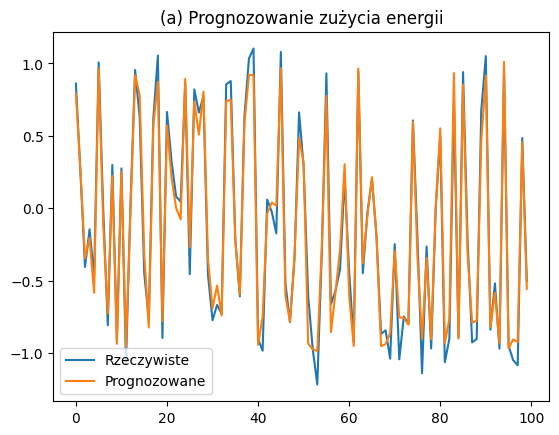

Epoch 1/10

25/25 [==============================] - 7s 80ms/step - loss: 0.6168 - accuracy: 0.8425 - val_loss: 0.5624 - val_accuracy: 0.9300
Epoch 2/10
25/25 [==============================] - 0s 16ms/step - loss: 0.4024 - accuracy: 0.9875 - val_loss: 0.1769 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 18ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 8/10
2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def generate_forecasting_data(n_samples=1000, freq=0.05, noise=0.1):
    x = np.arange(n_samples)
    y = np.sin(2 * np.pi * freq * x) + np.random.normal(0, noise, size=n_samples)
    return y.reshape(-1, 1)

def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

def run_forecasting():
    data = generate_forecasting_data()
    X, y = create_dataset(data, look_back=10)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(LSTM(50, input_shape=(10, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

    predictions = model.predict(X_test)

    plt.figure()
    plt.plot(y_test[:100], label="Rzeczywiste")
    plt.plot(predictions[:100], label="Prognozowane")
    plt.title("(a) Prognozowanie zużycia energii")
    plt.legend()
    plt.show()

def generate_anomaly_data(n_samples=1000, timesteps=10, anomaly_rate=0.1):
    X = np.random.normal(0, 1, (n_samples, timesteps))
    y = np.zeros(n_samples)
    n_anomalies = int(anomaly_rate * n_samples)
    anomalies = np.random.choice(n_samples, n_anomalies, replace=False)
    X[anomalies] += np.random.normal(5, 1, (n_anomalies, timesteps))
    y[anomalies] = 1
    return X.reshape(n_samples, timesteps, 1), y

def run_anomaly_detection():
    X, y = generate_anomaly_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(LSTM(32, input_shape=(10, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

def generate_sleep_data(n_classes=3, samples_per_class=500, timesteps=20):
    X, y = [], []
    for cls in range(n_classes):
        for _ in range(samples_per_class):
            if cls == 0:  # sen lekki
                seq = np.random.normal(0, 0.2, timesteps)
            elif cls == 1:  # sen głęboki
                seq = np.sin(np.linspace(0, 2*np.pi, timesteps)) + np.random.normal(0, 0.1, timesteps)
            else:  # REM
                seq = np.sin(np.linspace(0, 4*np.pi, timesteps)) + np.random.normal(0, 0.2, timesteps)
            X.append(seq)
            y.append(cls)
    X = np.array(X).reshape(-1, timesteps, 1)
    y = to_categorical(y, num_classes=n_classes)
    return X, y

def run_sleep_classification():
    X, y = generate_sleep_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(LSTM(64, input_shape=(20, 1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

run_forecasting()
run_anomaly_detection()
run_sleep_classification()

Epoch 1/10
25/25 [==============================] - 6s 74ms/step - loss: 0.6354 - accuracy: 0.9038 - val_loss: 0.5423 - val_accuracy: 0.9900
Epoch 2/10
25/25 [==============================] - 0s 17ms/step - loss: 0.3725 - accuracy: 0.9950 - val_loss: 0.1367 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 18ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 1s 26ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 8/10
25

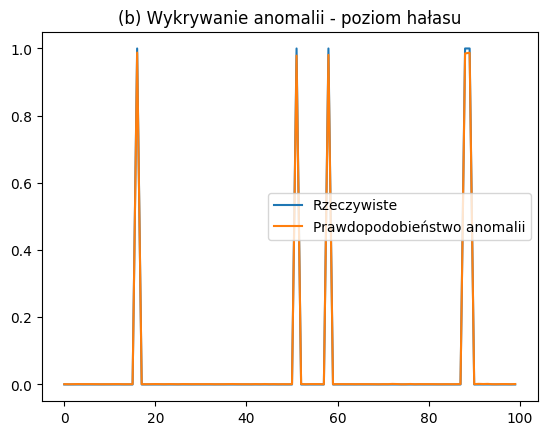

10/10 [==============================] - 1s 9ms/step


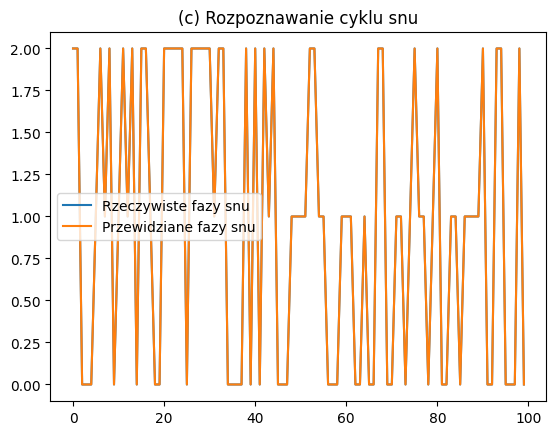

In [3]:
# POPRAWKA DO MODELI - DODAJEMY PLOT KTÓRY WIZUALIZUJE WYNIKI MODELI
def run_anomaly_detection_with_outputs():
    X, y = generate_anomaly_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(LSTM(32, input_shape=(10, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    return model, X_test, y_test

def run_sleep_classification_with_outputs():
    X, y = generate_sleep_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(LSTM(64, input_shape=(20, 1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

    return model, X_test, y_test

def plot_anomaly_predictions(model, X_test, y_test, n=100):
    preds = model.predict(X_test).flatten()
    plt.figure()
    plt.plot(y_test[:n], label='Rzeczywiste')
    plt.plot(preds[:n], label='Prawdopodobieństwo anomalii')
    plt.title("(b) Wykrywanie anomalii - poziom hałasu")
    plt.legend()
    plt.show()

def plot_sleep_predictions(model, X_test, y_test, n=100):
    preds = model.predict(X_test)
    preds_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    plt.figure()
    plt.plot(true_labels[:n], label='Rzeczywiste fazy snu')
    plt.plot(preds_labels[:n], label='Przewidziane fazy snu')
    plt.title("(c) Rozpoznawanie cyklu snu")
    plt.legend()
    plt.show()

# --- Uruchomienie i rysowanie ---
model_anomalia, Xn_test, yn_test = run_anomaly_detection_with_outputs()
model_sen, Xs_test, ys_test = run_sleep_classification_with_outputs()

plot_anomaly_predictions(model_anomalia, Xn_test, yn_test)
plot_sleep_predictions(model_sen, Xs_test, ys_test)
